In [1]:
# Predict

1. Используемый датасет: GTZAN dataset.  
http://marsyasweb.appspot.com/download/data_sets/
2. Используемый алгоритм для экстракции фич: mfcc - более подробно в комментариях  
Библиотека: python_speech_features 

---

**Что еще нужно?  **
  - Бороться с переобучением (+)?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from copy import copy

import python_speech_features as psf
import sunau
import librosa as lb

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

E:\C_folders\Users\Fen\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\C_folders\Users\Fen\Anaconda2\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
#Проверим загружаемость
audio_files_load = pd.read_csv('dataset.csv',index_col=0, sep=",", dtype=object)
audio_files_load

genre       file_name samplerate duration  \
0    blues  blues.00000.au      22050       30   
1    blues  blues.00001.au      22050       30   
2    blues  blues.00002.au      22050       30   
3    blues  blues.00003.au      22050       30   
4    blues  blues.00004.au      22050       30   
5    blues  blues.00005.au      22050       30   
6    blues  blues.00006.au      22050       30   
7    blues  blues.00007.au      22050       30   
8    blues  blues.00008.au      22050       30   
9    blues  blues.00009.au      22050       30   
10   blues  blues.00010.au      22050       30   
11   blues  blues.00011.au      22050       30   
12   blues  blues.00012.au      22050       30   
13   blues  blues.00013.au      22050       30   
14   blues  blues.00014.au      22050       30   
15   blues  blues.00015.au      22050       30   
16   blues  blues.00016.au      22050       30   
17   blues  blues.00017.au      22050       30   
18   blues  blues.00018.au      22050       30   
19   blues  blues.00019.au      22050       30   
20   blues  blues.00020.au      22050       30   
21   blues  blues.00021.au      22050       30   
22   blues  blues.00022.au      22050       30   
23   blues  blues.00023.au      22050       30   
24   blues  blues.00024.au      22050       30   
25   blues  blues.00025.au      22050       30   
26   blues  blues.00026.au      22050       30   
27   blues  blues.00027.au      22050       30   
28   blues  blues.00028.au      22050       30   
29   blues  blues.00029.au      22050       30   
..     ...             ...        ...      ...   
970   rock   rock.00070.au      22050       30   
971   rock   rock.00071.au      22050       30   
972   rock   rock.00072.au      22050       30   
973   rock   rock.00073.au      22050       30   
974   rock   rock.00074.au      22050       30   
975   rock   rock.00075.au      22050       30   
976   rock   rock.00076.au      22050       30   
977   rock   rock.00077.au      22050       30   
978   rock   rock.00078.au      22050       30   
979   rock   rock.00079.au      22050       30   
980   rock   rock.00080.au      22050       30   
981   rock   rock.00081.au      22050       30   
982   rock   rock.00082.au      22050       30   
983   rock   rock.00083.au      22050       30   
984   rock   rock.00084.au      22050       30   
985   rock   rock.00085.au      22050       30   
986   rock   rock.00086.au      22050       30   
987   rock   rock.00087.au      22050       30   
988   rock   rock.00088.au      22050       30   
989   rock   rock.00089.au      22050       30   
990   rock   rock.00090.au      22050       30   
991   rock   rock.00091.au      22050       30   
992   rock   rock.00092.au      22050       30   
993   rock   rock.00093.au      22050       30   
994   rock   rock.00094.au      22050       30   
995   rock   rock.00095.au      22050       30   
996   rock   rock.00096.au      22050       30   
997   rock   rock.00097.au      22050       30   
998   rock   rock.00098.au      22050       30   
999   rock   rock.00099.au      22050       30   

                                                  mean  \
0    [ -1.50538264  -1.66745918 -15.21220703   4.23...   
1    [ -3.27341626e+00   8.52053789e-01  -2.8907873...   
2    [ -9.43213843e-01   3.49022076e+00  -1.8450147...   
3    [ -3.39170231   9.25209884  -4.38120259   4.95...   
4    [ -1.96142936   0.93701381 -23.26517463  -1.32...   
5    [ -2.13538871e+00   2.49841696e+00  -1.5173896...   
6    [ -2.11225679e+00   1.16528963e+01  -2.3602408...   
7    [ -2.247435     7.78380454 -17.76835974  10.48...   
8    [ -1.55594314  -1.90990755 -11.38929456   8.59...   
9    [ -3.07371572e+00  -3.31702137e-01  -1.2556826...   
10   [ -2.16265072e+00   9.68014302e+00  -1.9329345...   
11   [ -5.00000705   5.09507121  -4.98582962  12.98...   
12   [ -2.44952959e+00   5.33121476e+00  -1.6649586...   
13   [ -3.00262460e+00   2.44281473e+00  -4.0852536...   
14   [ -4.66073991   3.7070764   -

In [3]:
audio_files_load.iloc[0, 4]

'[ -1.50538264  -1.66745918 -15.21220703   4.23198313  -9.58464693\n   2.58241955 -18.42872884   6.35673123 -14.76404361   7.11813274\n  -7.61231446   7.73238963  -4.81976457   3.36533101  -5.88293318\n  -1.61010153  -2.58018652   0.83373388  -2.6204491    1.02039765\n  -1.43262021  -0.11374151  -0.09444546  -0.09804753   0.28404624\n  -0.70090855]'

In [4]:
# Процессинг датасета
def StringToList(string):
    string = string.replace("\n", "")
    string = string[1:-1] # Убираем квадратные скобки

    result = list()
    for s in string.split(" "):
        if s == "":
            continue
        else:
            result.append(float(s))

    return result

In [5]:
audio_files_load.iloc[:, 4:10] = audio_files_load.iloc[:, 4:10].applymap(StringToList)

In [46]:
def prepare_data(data, normalize=True):
    #X = data.iloc[:,[4,5,6,7]].values
    X = data.iloc[:,4:].values
    y = data.iloc[:,0]
    
    res = list()
    for x in X:
        res_prep = list()
        for element in x:
            res_prep += element
        res.append(res_prep)
    X = np.array(res, dtype=np.float32)
    
    #Добавим нормировку и центрирование!
    if normalize == True:
        X = (X-X.mean(axis=0))/X.std(axis=0)
    
    le = LabelEncoder()
    le.fit(y)
    y = le.transform(y)
    return X, y

In [180]:
X, y = prepare_data(audio_files_load, False)

means = X.mean(axis=0)
stds = X.std(axis=0)

In [186]:
pd.DataFrame(data=means).to_csv('means.csv')
pd.DataFrame(data=stds).to_csv('stds.csv')

In [183]:
X, y = prepare_data(audio_files_load)

np.random.seed(222)
random_idx = range(X.shape[0])
np.random.shuffle(random_idx)
X = X[random_idx]
y = y[random_idx]
print y

[9 3 4 6 8 7 5 1 6 1 1 6 9 5 7 0 4 0 7 1 3 4 1 3 7 7 1 8 4 4 8 5 5 6 9 6 9
 0 5 2 4 8 9 1 3 0 1 4 2 2 5 3 7 6 0 2 8 5 5 1 5 0 0 3 5 3 9 1 3 4 0 8 3 9
 8 5 2 7 9 4 9 6 3 2 0 9 2 9 5 2 6 7 0 4 2 8 4 6 7 2 6 3 9 8 6 4 3 8 6 3 8
 2 4 8 9 2 4 7 7 2 1 0 3 2 4 3 7 8 9 6 8 9 0 8 1 4 7 2 8 0 2 0 0 9 8 3 9 1
 9 3 2 1 5 1 6 0 8 2 5 3 6 0 1 2 2 4 6 1 4 1 6 7 8 0 2 9 4 2 0 3 7 3 1 1 8
 6 6 7 8 4 4 6 9 1 2 1 8 9 4 3 7 8 7 6 9 9 9 3 4 9 6 1 2 8 8 3 3 9 6 0 5 2
 3 2 4 2 5 7 5 0 7 9 8 1 0 9 0 6 6 9 0 2 0 4 2 8 8 5 7 9 4 0 9 4 9 8 7 0 5
 9 2 0 7 2 7 9 7 6 6 8 8 9 7 1 7 8 0 5 2 6 6 7 0 0 9 4 3 3 7 8 8 6 5 6 2 1
 5 5 1 0 3 5 6 7 9 7 1 0 8 2 9 6 4 6 1 6 4 5 3 1 2 2 7 5 9 3 3 0 6 1 8 8 4
 9 5 1 8 6 5 5 0 6 3 5 2 0 8 3 3 6 4 3 9 1 1 4 9 6 9 4 8 3 9 0 9 4 9 9 1 4
 3 7 1 4 0 2 8 3 7 6 0 3 1 1 0 5 5 3 0 7 7 7 8 6 7 9 2 9 8 8 1 6 9 1 1 8 3
 6 3 4 8 9 0 3 5 9 2 4 8 0 5 1 2 6 2 6 6 4 8 9 7 8 7 2 5 2 1 0 3 2 5 2 2 9
 3 7 1 7 8 6 1 5 7 2 5 3 2 7 9 4 0 7 3 1 7 9 5 8 2 2 8 3 4 4 2 6 9 6 8 2 4
 2 9 8 2 7 6 9 9 7 1 5 4 

In [53]:
#Делаем test_train
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, test_size=0.1, random_state=123)

In [54]:
# Без нормировки
X_nn, y_nn = prepare_data(audio_files_load, False)
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_nn, y_nn, train_size=0.9, test_size=0.1, random_state=0)

** SVM - без доп. преобразований **

In [8]:
from sklearn.svm import SVC

In [9]:
def select_model(x, y, model, param_grid, n_jobs=1):
    best_accuracy = 0
    best_model = None
    #print param_grid
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=n_jobs)
    grid.fit(x,y)
    
    #print cross_val_score(model, x, y, scoring='accuracy')
    #accuracy = np.mean(cross_val_score(model, x, y, scoring='accuracy'))

    best_model = grid.best_estimator_
    best_accuracy = grid.best_score_
    
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model, grid

In [24]:
param_grid = [{'C':[1, 10, 100, 1000],
               'kernel':['linear'],
               'coef0':[0.0, 0.5, 1.0]},
              {'C':[1, 10, 100, 1000],
               'kernel':['poly'],
               'degree':[2,3,4],
               'coef0':[0.0, 0.5, 1.0]},
              {'C':[1, 10, 100, 1000],
               'kernel':['rbf'],
               'degree':[2,3,4],
               'coef0':[0.0, 0.5, 1.0]}]

model, grid = select_model(X, y, SVC(), param_grid)

Fitting 10 folds for each of 84 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  2.2min finished


Best model SVC(C=1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.763000


In [25]:
grid.grid_scores_

[mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1, 'coef0': 0.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1, 'coef0': 0.5},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1, 'coef0': 1.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 10, 'coef0': 0.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 10, 'coef0': 0.5},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 10, 'coef0': 1.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 100, 'coef0': 0.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 100, 'coef0': 0.5},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 100, 'coef0': 1.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1000, 'coef0': 0.0},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1000, 'coef0': 0.5},
 mean: 0.71300, std: 0.03378, params: {'kernel': 'linear', 'C': 1000, 'coef0': 1.0}

In [55]:
model.fit(X_train, y_train)
y_hat_test = model.predict(X_test)

print y_hat_test
print y_test

[3 3 5 6 3 4 6 7 8 2 1 2 9 7 3 0 8 7 7 4 5 0 0 6 1 3 4 0 7 1 8 1 1 5 7 4 5
 3 8 2 7 8 6 9 1 5 5 9 9 9 0 4 2 5 3 9 8 1 4 8 3 4 2 0 1 3 4 0 1 2 0 2 8 5
 7 4 8 2 5 2 0 7 2 7 3 8 6 5 6 7 3 4 0 2 1 5 4 2 7 9]
[9 6 5 6 8 4 6 7 8 2 1 2 9 7 8 0 4 2 7 4 1 0 0 6 1 4 4 9 7 1 4 1 1 5 4 4 1
 3 8 1 7 8 6 9 1 5 5 9 3 9 0 3 2 5 3 8 8 1 4 8 9 4 8 0 1 3 4 5 1 7 0 2 8 1
 7 4 8 2 8 2 0 7 0 7 9 9 6 5 6 7 3 7 0 8 1 5 8 8 7 9]


In [56]:
print accuracy_score(y_test, y_hat_test)

#Проверка модели без подбора
print accuracy_score(y_test, SVC().fit(X_train, y_train).predict(X_test))

0.71
0.74


In [57]:
print cross_val_score(model, X, y, cv=10).mean() #Подобранные параметры
print cross_val_score(test_model, X, y, cv=10).mean() #"Чистый" SVM, без подбора параметров

0.763
0.752


** PCA и LDA, QDA **

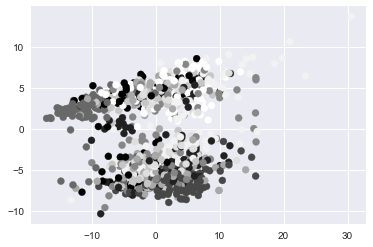

In [14]:
#Прикинем PCA
dec = PCA(n_components=2)
dec.fit(X)
vis = dec.fit_transform(X)
plt.scatter(vis[:,0], vis[:,1], c=y)

(1000L, 2L)


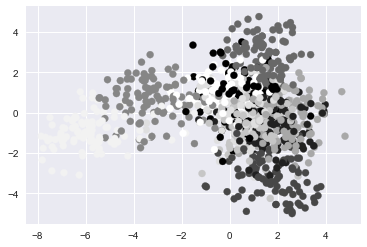

In [124]:
#Прикинем LDA
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
ld = lda.fit_transform(X, y)
print ld.shape

plt.rcParams["axes.grid"] = True
plt.scatter(ld[:,0], ld[:,1], c=y)

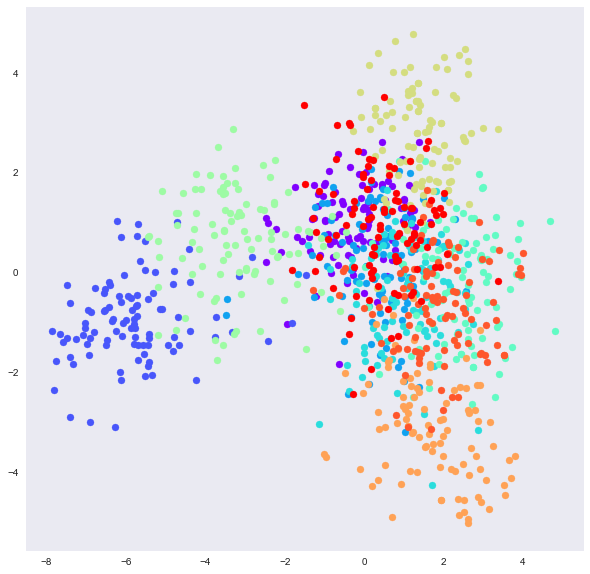

In [176]:
# Расширенная визуализация LDA
import matplotlib.cm as cm

visual = lda.fit_transform(X, y)
plt.figure(figsize=(10, 10))
colors = plt.cm.rainbow(np.linspace(0,1,10))
for genre in xrange(10):
    plt.scatter(visual[y==genre][:,0], visual[y==genre][:,1], c=colors[genre])
    plt.legend()
plt.show()

In [16]:
#Сравнение LDA и QDA
qda = QuadraticDiscriminantAnalysis(reg_param=0.35)
print cross_val_score(qda, X, y, cv=20).mean()
print accuracy_score(y_pred=qda.fit(X_train, y_train).predict(X_test), y_true=y_test)

lda = LinearDiscriminantAnalysis()
print cross_val_score(lda, X, y, cv=20).mean()
print accuracy_score(y_pred=lda.fit(X_train, y_train).predict(X_test), y_true=y_test)

E:\C_folders\Users\Fen\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


0.737
0.73
0.739
0.67


In [17]:
# Подбор LDA и QDA

PCA+SVM ?!

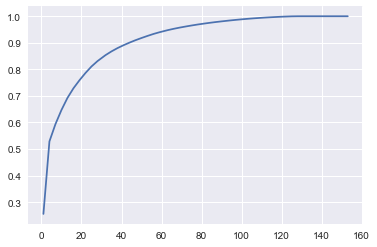

In [15]:
# %объясненной дисперсии
n_components = np.linspace(1, X.shape[1]-1, dtype=int)
expl_disp_ratio = [PCA(n_components=i).fit(X).explained_variance_ratio_.sum() for i in n_components]
#print expl_disp_ratio[1]
plt.plot(n_components, expl_disp_ratio)

In [41]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.estimator_checks import check_estimator

#Для подсчета шагов
def PrintIteration(iteration=[]):
    if not iteration:
        iteration.append(0)
    print iteration[0]
    iteration [0] += 1

class PCA_SVC(BaseEstimator, ClassifierMixin):
    def __init__(self, n_components=None, svd_solver='auto', C=1, kernel='rbf', coef0=0.0, degree=2):
        #print n_components, svd_solver, C, kernel, coef0, degree
        self.estimator = Pipeline([('PCA', PCA(n_components=n_components, svd_solver=svd_solver)), 
                                   ('SVC', SVC(C=C, kernel=kernel, coef0=coef0, degree=degree))])
        #print "INIT", self.estimator.get_params(False)
    def fit(self, X, y):
        print PrintIteration(), self.estimator.get_params(False)
        return self.estimator.fit(X, y)
    def predict(self, X):
        return self.estimator.predict(X)
    def fit_predict(self, X, y):
        return self.estimator.fit_predict(X, y)
    def set_params(self, **parameters):
        result = self.estimator.set_params(**parameters)
        #print self.estimator.get_params(False)
        return result

In [42]:
#check_estimator(PCA_SVC)

#Такие странные названия, чтобы параметры могли устанавливаться в Pipline
def AddCommonParamsPCASVC(dictionary):
    param_grid_pcasvc_base = {'PCA__svd_solver':['auto', 'full'],
                              'PCA__n_components':np.linspace(2, X.shape[1], num=5, dtype=int), #100 - подбор по графику выше
                              'SVC__C':[0.1, 1.0, 10.0],
                              'SVC__max_iter':[10000, 30000]}
    return dict(dictionary.items()+param_grid_pcasvc_base.items())

param_grid_pcasvc = [AddCommonParamsPCASVC({'SVC__kernel':['linear'], 'SVC__coef0':[0.0], 'SVC__degree':[1]}),
                     AddCommonParamsPCASVC({'SVC__kernel':['poly'], 'SVC__coef0':[0.0, 0.5, 1.0], 'SVC__degree':[2, 3, 4]}),
                     AddCommonParamsPCASVC({'SVC__kernel':['rbf'], 'SVC__coef0':[0.0], 'SVC__degree':[2, 3, 4]})]
#print param_grid_pcasvc
model_pcasvc, grid_pcasvc = select_model(X, y, PCA_SVC(), param_grid_pcasvc, 1)
print model_pcasvc
print grid_pcasvc

Fitting 10 folds for each of 780 candidates, totalling 7800 fits
0
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, 

23
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
24
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
25
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

E:\C_folders\Users\Fen\Anaconda2\lib\site-packages\sklearn\svm\base.py:218: ConvergenceWarning: Solver terminated early (max_iter=30000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


35
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
36
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
37
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

56
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
57
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
58
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

79
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
80
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
81
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

100
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
101
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
102
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

125
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
126
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
127
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

147
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
148
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

168
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
169
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
170
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

190
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
191
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
192
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

212
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
213
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
214
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

233
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
234
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
235
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

256
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
257
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
258
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

277
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
278
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
279
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

298
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
299
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
300
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

319
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
320
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
321
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

340
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
341
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
342
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

361
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
362
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
363
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

383
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
384
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
385
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

404
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
405
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
406
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

426
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
427
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
428
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

447
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
448
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
449
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

470
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
471
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
472
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

491
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
492
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
493
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

513
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
514
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
515
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

535
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
536
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
537
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

557
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
558
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
559
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

579
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
580
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
581
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

601
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
602
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
603
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

622
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
623
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
624
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

643
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
644
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
645
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

665
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
666
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
667
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

686
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
687
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
688
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

707
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
708
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
709
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

729
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
730
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
731
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

750
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
751
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
752
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

771
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
772
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
773
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight

792
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
793
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
794
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

813
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
814
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
815
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

834
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
835
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
836
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

855
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
856
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
857
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

876
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
877
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
878
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

897
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
898
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
899
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

918
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
919
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
920
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

939
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
940
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
941
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight

960
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
961
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
962
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_wei

981
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
982
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
983
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_wei

1002
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1003
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1004
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1023
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1024
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1025
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1044
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1045
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1046
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1065
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1066
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1067
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1086
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1087
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1088
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1108
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1109
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1130
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1151
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1170
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1191
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1192
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1212
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1213
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1214
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1233
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1234
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1235
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1254
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1255
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1256
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1275
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1276
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1277
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1296
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1297
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1298
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1317
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1318
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1319
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

1338
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1339
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1340
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1359
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1360
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1361
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1380
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1381
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1382
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1401
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1402
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1403
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1422
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1423
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1424
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1443
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1444
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1445
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1464
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1465
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1466
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1485
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1486
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1487
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

1506
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1507
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1508
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1527
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1528
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1529
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1548
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1549
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1550
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1569
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1570
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1571
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1590
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1591
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1592
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1611
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1612
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1613
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1632
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1633
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1634
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1653
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1654
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1655
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1674
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1675
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1676
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

1696
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1697
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1698
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1718
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1719
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1720
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1740
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1741
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1742
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1764
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

1785
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1786
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1787
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1810
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1811
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1812
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1834
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1835
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1836
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1857
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1858
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1859
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

1878
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1879
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1880
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

1901
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1902
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1903
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

  tol=0.001, verbose=False))], 'memory': None}
1923
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1924
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1925
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=Fal

1947
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1948
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1949
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

1970
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1971
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1972
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

1991
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1992
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
1993
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2015
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2016
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2017
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2038
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2039
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2040
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

2059
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2060
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2061
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2082
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2083
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2084
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2104
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2105
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2130
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2151
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2152
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2153
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2173
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2174
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2196
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2197
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2198
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2218
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2219
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2220
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, clas

2239
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2240
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2241
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2262
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2263
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2264
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2284
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2285
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2286
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2305
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2306
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2307
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2328
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2329
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2352
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2353
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2354
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2376
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2377
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2378
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2397
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2398
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2399
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2419
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2420
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2421
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2440
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2441
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2442
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2461
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2462
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2463
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2485
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2486
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

2506
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2507
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2508
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2530
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2531
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2532
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2554
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2555
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2556
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2577
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2578
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2579
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2598
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2599
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2600
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2621
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2622
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2623
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2642
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2643
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2644
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2665
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2666
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2667
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2688
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2689
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2690
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2713
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2714
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2715
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2737
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2738
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2739
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

2758
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2759
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2760
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, clas

2779
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2780
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2781
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2800
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2801
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2802
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2823
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2824
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2825
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2844
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2845
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2846
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2866
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2867
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2887
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2888
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2889
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2908
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2909
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2910
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2930
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2931
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2932
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

2952
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2953
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2954
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2974
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2975
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2976
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

2996
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2997
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
2998
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3018
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3019
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3020
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3040
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3041
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3042
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3062
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3064
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3083
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3084
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3104
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3105
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3126
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3127
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3148
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3170
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3192
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3194
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3213
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3214
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3215
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3235
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3236
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3237
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3256
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3257
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3258
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3277
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3278
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3279
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3298
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3299
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3300
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, clas

3320
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3321
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3322
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3342
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3343
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3344
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3363
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3364
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3365
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3384
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3385
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3386
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3405
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3406
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3407
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3428
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3429
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3430
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3449
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3450
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3451
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

3471
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3472
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3473
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

  tol=0.001, verbose=False))], 'memory': None}
3493
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3494
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3495
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=Fal

3514
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3515
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3516
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3536
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3537
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3538
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3558
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3559
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3560
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3580
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3581
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3582
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3603
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3604
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3605
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3624
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3625
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3626
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3646
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3647
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3648
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

3668
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3669
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3670
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3690
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3691
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3692
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3712
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3713
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3714
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3735
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3736
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3737
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3758
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3759
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3760
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3780
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3781
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3782
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3801
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3802
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3803
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3823
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3824
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3825
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

3845
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3846
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3847
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3867
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3868
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3869
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3888
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3889
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3890
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3910
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3911
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3912
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3932
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3933
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3934
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3954
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3955
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3956
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3976
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3977
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3978
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

3998
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
3999
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4000
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4020
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4021
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4022
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4042
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4043
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4044
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4064
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4065
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4084
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4086
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4108
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4130
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4151
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4173
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4194
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4195
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4215
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4216
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4217
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4237
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4238
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4239
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4258
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4259
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4260
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4280
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4281
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4282
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4302
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4303
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4304
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4324
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4325
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4326
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4346
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4347
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4348
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4368
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4369
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4370
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4390
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4391
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4392
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4412
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4413
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4414
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4434
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4435
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4456
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4478
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4500
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4502
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4522
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4523
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4524
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4544
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4545
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4546
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4566
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4567
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4568
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4588
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4589
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4590
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4610
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4611
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4612
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4631
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4632
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4633
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4653
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4654
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4655
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4675
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4676
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4677
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4698
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4699
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4700
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4719
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4720
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4721
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

4741
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4742
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4743
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4763
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4764
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4784
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4785
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4786
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4806
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4807
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4808
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4828
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4829
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4830
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4850
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4851
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4852
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4871
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4872
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4873
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4892
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4893
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4894
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4914
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4915
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4916
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

4935
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4936
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4937
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4956
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4957
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4958
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4977
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4978
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4979
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

4998
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
4999
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5000
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5019
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5020
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5021
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5040
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5041
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5042
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5062
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5064
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5084
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5086
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5105
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5127
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5148
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5170
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5192
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5194
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5214
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5215
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5216
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5235
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5236
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5237
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5257
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5258
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5259
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5279
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5280
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5281
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, c

5300
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5301
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5302
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5321
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5322
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5323
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5342
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5343
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5344
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5364
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5365
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5366
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5385
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5386
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5387
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5407
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5408
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5409
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5429
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5430
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5431
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5451
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5452
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5453
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5472
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5473
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5474
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5493
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5494
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5495
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5514
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5515
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5516
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5536
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5537
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5538
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5558
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5559
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5560
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5580
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5581
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5582
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5602
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5603
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5604
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5624
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5625
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5626
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

5646
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5647
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5648
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5667
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5668
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5669
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5688
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5689
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5690
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5710
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5711
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5712
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5732
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5733
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5734
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5754
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5755
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5756
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5776
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5777
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5778
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5798
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5799
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5800
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

5820
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5821
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5822
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5842
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5843
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5844
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5863
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5864
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5884
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5885
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5886
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5906
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5907
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5908
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5927
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5928
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5929
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5948
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5949
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5950
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5970
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5971
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5972
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

5992
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5993
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
5994
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

6015
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6016
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6017
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

6038
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6039
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6040
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

6062
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6064
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6086
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6087
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6108
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6109
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6130
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6131
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6132
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6153
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6154
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6155
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6174
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6175
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6176
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6195
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6196
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6197
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

6217
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6218
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6219
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

6239
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6240
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6241
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6260
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6261
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6262
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6281
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6282
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6283
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weigh

6302
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6303
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6304
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6325
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6326
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6347
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6348
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6349
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

6369
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6370
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6371
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6391
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6392
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6393
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6413
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6414
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6435
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6459
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6481
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

6501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6502
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6503
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6523
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6524
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6525
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6545
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6546
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6547
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6567
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6568
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6569
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6589
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6590
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6591
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6611
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6612
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6613
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6633
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6634
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6635
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6655
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6656
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6657
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6677
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6678
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6679
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6699
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6700
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6701
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6721
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6722
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6723
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6743
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6744
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6745
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6766
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6767
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6787
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6788
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6789
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6809
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6810
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6811
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6831
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6832
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6833
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6853
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6854
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6855
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6875
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6876
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6877
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6897
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6898
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6899
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

6919
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6920
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6921
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6941
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6942
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6943
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

6963
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6964
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6965
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

6985
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6986
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
6987
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

7007
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7008
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7009
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

7029
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7030
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7031
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

7051
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7052
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7053
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

7073
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7074
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7075
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

7094
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7095
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7096
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7115
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7116
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7117
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7136
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7137
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7138
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7158
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7159
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7160
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7180
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7181
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7182
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7202
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7203
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_w

7222
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7223
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7224
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7243
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7244
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7245
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7264
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7265
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7266
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7285
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7286
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7287
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7306
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7307
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7308
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7328
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7329
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7330
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7350
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7351
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7352
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7372
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7373
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7374
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7393
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7394
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7395
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7416
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7417
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7438
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_w

7457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7459
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7478
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7499
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7500
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7520
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7521
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7522
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7541
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7542
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7543
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7562
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7563
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7564
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7583
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7584
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7585
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7604
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7605
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7606
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7625
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7626
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7627
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7646
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7647
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7648
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7667
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7668
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7669
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7689
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7690
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7691
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7711
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7712
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7713
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7733
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7734
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7735
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7754
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7755
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7756
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7775
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7776
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7777
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7796
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7797
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7798
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

[Parallel(n_jobs=1)]: Done 7800 out of 7800 | elapsed: 27.4min finished


Best model Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]), with accuracy 0.765000
Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
GridSearchCV(cv=10, error_score='raise',
       estimator=PCA_SVC(C=None, coef0=None, degree=None, kernel=None, n_components=None,
    svd_solver=None),
      

In [58]:
model_pcasvc.set_params(SVC__max_iter=-1) #Уберем лимит для fit
model_pcasvc.fit(X_train, y_train)

print accuracy_score(y_true=y_test, y_pred=model_pcasvc.predict(X_test))

0.71


In [59]:
#Запомним модель из кросс-валидации
print model_pcasvc

Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


** SVM+PCA - качество без нормировки **

In [47]:
# А если без нормировки?
model_pcasvc_nn, grid_pcasvc_nn = select_model(X_nn, y_nn, PCA_SVC(), param_grid_pcasvc, 1)

Fitting 10 folds for each of 780 candidates, totalling 7800 fits
7800
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7801
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7802
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', 

7821
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7822
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7823
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7842
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7843
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7844
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7866
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7867
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

7886
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7887
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7888
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

7907
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7908
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7909
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

7928
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7929
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7930
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

7950
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7951
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7952
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

7971
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7972
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7973
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

7992
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7993
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
7994
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

8014
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8015
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8016
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

8035
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8036
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8037
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

8057
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8058
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8059
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

8079
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8080
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8081
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

8101
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8102
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8103
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

8123
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8124
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8125
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

8144
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8145
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8146
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

8166
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8167
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8168
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200,

8188
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8189
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8190
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200,

8210
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8211
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8212
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=2

8232
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8233
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8234
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200,

8254
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8255
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8256
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200,

8276
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8277
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8278
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=2

8298
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8299
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8300
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200,

8320
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8321
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8322
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=2

8342
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8343
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8344
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200,

8364
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8365
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8366
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200,

8386
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8387
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8388
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=2

8407
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8408
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8409
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8428
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8429
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8430
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8449
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8450
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8451
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8470
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8471
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8472
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8491
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8492
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8493
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8512
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8513
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8514
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8533
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8534
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8535
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8554
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8555
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8556
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8575
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8576
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8577
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8596
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8597
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8598
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8617
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8618
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8619
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8638
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8639
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8640
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8659
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8660
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8661
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8680
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8681
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8682
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8701
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8702
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8703
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8722
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8723
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8724
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8743
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8744
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8745
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

8764
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8766
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8785
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8786
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8787
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8806
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8807
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8808
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8827
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8828
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8829
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8848
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8849
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8850
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8869
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8870
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8871
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8890
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8891
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8892
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8911
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8912
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8913
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8932
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8933
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8934
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

8953
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8954
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8955
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8974
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8975
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8976
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

8995
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8996
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
8997
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9016
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9017
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9018
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9037
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9038
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9039
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9058
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9059
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9060
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9079
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9080
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9081
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9100
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9101
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9102
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_wei

9121
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9122
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9123
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9142
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9143
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9144
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9163
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9164
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9165
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9184
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9185
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9186
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9205
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9206
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9207
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9226
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9227
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9228
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9247
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9248
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9249
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9268
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9269
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9270
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9289
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9290
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9291
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_wei

9310
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9311
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9312
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9331
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9332
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9333
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9352
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9353
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9354
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9373
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9374
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9375
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9394
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9395
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9396
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9416
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9417
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9438
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9459
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_

9478
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9502
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9503
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weigh

9524
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9525
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9526
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9545
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9546
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9547
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9568
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9569
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9570
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9589
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9590
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9591
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9610
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9611
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9612
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9634
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9635
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9636
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9656
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9657
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9658
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_

9677
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9678
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9679
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9699
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9700
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9701
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9720
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9721
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9722
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9741
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9742
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9743
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9763
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9764
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9786
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9787
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9788
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9808
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9809
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9810
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9829
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9830
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9831
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_

9850
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9851
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9852
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9872
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9873
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9874
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9893
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9894
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9895
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9914
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9915
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9916
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9936
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9937
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9938
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9958
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9959
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9960
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

9979
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9980
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
9981
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cla

10001
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10002
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10003
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10022
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10023
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10024
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10044
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10045
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10046
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10066
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10067
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10068
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10089
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10090
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10091
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10113
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10114
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10115
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10136
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10137
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10138
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10157
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10158
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10159
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10180
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10181
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10182
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10201
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10202
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10203
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10223
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10224
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10225
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10245
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10246
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10247
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10266
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10267
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10268
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10288
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10289
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10290
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10309
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10310
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10311
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10330
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10331
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10332
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10351
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10352
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10353
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10374
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10375
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10376
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10395
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10396
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10397
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10416
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10417
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10418
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10438
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10439
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10440
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10459
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10460
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10461
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10481
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10482
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10483
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10504
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10505
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10506
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10527
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10528
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10529
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10549
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10550
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10551
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10571
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10572
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10573
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10593
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10594
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10595
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10614
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10615
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10616
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10636
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10637
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10638
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10659
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10660
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10661
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10681
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10682
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10683
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10704
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10705
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10706
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10725
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10726
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10727
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

10747
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10748
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10749
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10770
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10771
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10772
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10791
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10792
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10793
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10813
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10814
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10815
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10834
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10835
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10836
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10856
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10857
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10858
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10877
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10878
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10879
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10898
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10899
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10900
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

10919
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10920
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10921
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, c

10941
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10942
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10943
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10963
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10964
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10965
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

10985
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10986
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
10987
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11008
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11009
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11010
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11030
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11031
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11032
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11052
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11053
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11054
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11075
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11076
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11077
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11097
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11098
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11099
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11119
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11120
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11121
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11141
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11142
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11143
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11163
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11164
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11165
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11184
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11185
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11186
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11205
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11206
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11207
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11226
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11227
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11228
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11248
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11249
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11250
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11270
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11271
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11272
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cla

11292
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11293
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11294
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11315
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11316
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11317
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11337
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11338
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11339
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11358
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11359
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11360
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11381
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11382
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11383
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11403
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11404
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11405
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11425
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11426
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11427
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11446
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11447
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11448
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cla

11468
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11469
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11470
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11489
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11490
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11491
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11511
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11512
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11513
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11533
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11534
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11535
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11556
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11557
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11558
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11577
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11578
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11579
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11600
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11601
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11602
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11621
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11622
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11623
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, 

11643
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11644
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11645
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11665
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11666
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11667
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11687
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11688
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11689
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11709
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11710
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11711
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11731
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11732
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11733
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11753
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11754
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11755
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11775
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11776
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11777
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11797
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11798
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11799
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

11819
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11820
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11821
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11841
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11842
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11843
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11863
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11864
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11885
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11886
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11887
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11907
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11908
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11909
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11929
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11930
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11931
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11951
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11952
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11953
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11973
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11974
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11975
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

11995
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11996
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
11997
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12017
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12018
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12019
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12039
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12040
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12041
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12061
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12062
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12083
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12084
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12105
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12127
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12149
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12151
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12173
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12194
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12195
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12215
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12216
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12217
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12237
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12238
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12239
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12259
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12260
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12261
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12281
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12282
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12283
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12303
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12304
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12305
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12325
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12326
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12347
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12348
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12349
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12369
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12370
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12371
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12391
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12392
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12393
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12413
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12414
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12435
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12459
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12481
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12502
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12503
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12523
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12524
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12525
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12545
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12546
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12547
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12567
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12568
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12569
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12589
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12590
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12591
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12611
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12612
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12613
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12633
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12634
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12635
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12655
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12656
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12657
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12677
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12678
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12679
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12699
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12700
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12701
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

12721
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12722
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12723
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12743
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12744
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12745
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12764
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12765
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12766
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12786
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12787
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12788
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12808
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12809
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12810
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12830
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12831
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12832
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12852
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12853
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12854
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12874
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12875
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12876
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12895
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12896
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12897
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

12916
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12917
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12918
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12938
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12939
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12940
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12959
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12960
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12961
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

12980
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12981
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
12982
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13002
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13003
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13004
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13024
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13025
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13026
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13046
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13047
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13048
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13067
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13068
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13069
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13089
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13090
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13091
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13111
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13112
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13113
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13132
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13133
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13134
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13154
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13155
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13156
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13176
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13177
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13178
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13197
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13198
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13199
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13218
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13219
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13220
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13240
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13241
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13242
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13262
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13263
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13264
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13284
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13285
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13286
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13305
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13306
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13307
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13328
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13329
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13349
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13350
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13351
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13370
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13371
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13372
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13392
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13393
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13394
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13414
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13416
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13435
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, 

13456
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13478
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13499
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13500
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13521
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13522
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13523
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13542
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13543
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13544
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13564
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13565
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13566
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13586
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13587
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13588
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13607
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13608
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13609
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, 

13628
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13629
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13630
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13650
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13651
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13652
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13671
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13672
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13673
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13692
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13693
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13694
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13714
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13715
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13716
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13735
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13736
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.5,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13737
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13756
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13757
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13758
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13778
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13779
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13780
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=20

13799
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=1.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='poly',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13800
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13801
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, clas

13822
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13823
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13824
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

13843
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13844
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13845
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

13865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13866
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13867
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

13888
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13889
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13890
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

13911
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13912
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13913
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

13933
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13934
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13935
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

13954
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13955
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13956
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

13975
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13976
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13977
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

13998
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
13999
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14000
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

14020
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14021
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14022
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_we

14042
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14043
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14044
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

14063
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14064
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14065
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

14085
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14086
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14087
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_we

14106
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14107
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14108
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

14127
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14128
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14129
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

14150
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14151
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14152
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class

14171
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14172
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14173
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14193
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14194
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14195
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14215
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14216
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14217
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14237
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14238
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14239
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14259
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14260
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14261
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14281
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14282
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14283
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14303
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14304
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14305
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14325
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14326
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14347
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14348
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14349
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14369
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14370
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14371
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14391
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14392
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14393
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14413
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14414
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14415
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14435
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14436
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14437
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14456
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14457
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14458
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14478
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14479
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14480
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14500
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14501
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14502
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=40, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14522
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14523
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14524
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14544
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14545
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14546
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14565
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14566
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14567
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14586
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14587
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14588
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14607
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14608
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14609
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14629
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14630
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14631
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14650
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14651
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14652
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14671
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14672
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14673
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14692
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14693
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14694
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14714
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14715
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14716
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14736
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14737
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14738
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class

14758
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14759
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14760
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14779
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14780
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14781
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14800
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14801
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14802
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class

14821
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14822
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14823
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

14842
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14843
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14844
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, cl

None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14864
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14865
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_we

14884
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14885
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14886
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

14905
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14906
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14907
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

14926
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14927
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14928
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

14947
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14948
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14949
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

14968
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14969
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14970
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

14989
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14990
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
14991
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15010
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15011
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15012
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15031
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15032
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15033
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15052
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15053
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15054
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15073
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15074
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15075
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15094
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15095
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15096
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15115
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15116
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15117
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15136
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15137
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15138
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15157
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15158
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15159
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15178
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15179
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15180
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, c

15199
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15200
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15201
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15220
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15221
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15222
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=116, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15241
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15242
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15243
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15262
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15263
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15264
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15283
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15284
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15285
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15304
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15305
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15306
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15325
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15326
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15327
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15346
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15347
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15348
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15367
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15368
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15369
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15388
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15389
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15390
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15409
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15410
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15411
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15430
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15431
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15432
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15451
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15452
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15453
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15472
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15473
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15474
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, cl

15493
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15494
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15495
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15514
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15515
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15516
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15535
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15536
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15537
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=1.0, cache_size=200, cl

15556
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15557
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15558
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15577
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15578
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15579
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200,

15598
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}
15599
None {'steps': [('PCA', PCA(copy=True, iterated_power='auto', n_components=154, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)), ('SVC', SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto', kernel='rbf',
  max_iter=30000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'memory': None}


[Parallel(n_jobs=1)]: Done 7800 out of 7800 | elapsed: 32.3min finished


Best model Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=10000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]), with accuracy 0.612000


In [60]:
model_pcasvc_nn.set_params(SVC__max_iter=-1) #Уберем лимит для fit
model_pcasvc_nn.fit(X_nn_train, y_nn_train)

print accuracy_score(y_true=y_nn_test, y_pred=model_pcasvc_nn.predict(X_nn_test))

0.64


In [61]:
print model_pcasvc_nn

Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=78, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('SVC', SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])


Без нормировки хуже

** Grid для LDA и QDA. С нормировкой и без **

In [158]:
# Подбор параметров LDA и QDA
param_grid_lda = [{'solver': ['lsqr', 'eigen'],
                   'shrinkage': ['auto']+list(np.linspace(0, 1, num=5)),
                   'tol': [1e-4, 1e-5]},
                  {'solver': ['svd'],
                   'tol': [1e-4, 1e-5]}]
param_grid_qda = {'reg_param': np.arange(0.1, 2.0, 0.01),
                  'tol': [1e-4, 1e-5]}

In [160]:
model_lda, grid_lda = select_model(X, y, LinearDiscriminantAnalysis(), param_grid_lda, 1)

Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best model LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001), with accuracy 0.736000


[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    2.8s finished


In [161]:
grid_lda.grid_scores_

[mean: 0.73600, std: 0.03693, params: {'shrinkage': 'auto', 'tol': 0.0001, 'solver': 'lsqr'},
 mean: 0.73600, std: 0.03693, params: {'shrinkage': 'auto', 'tol': 1e-05, 'solver': 'lsqr'},
 mean: 0.72200, std: 0.03894, params: {'shrinkage': 'auto', 'tol': 0.0001, 'solver': 'eigen'},
 mean: 0.72200, std: 0.03894, params: {'shrinkage': 'auto', 'tol': 1e-05, 'solver': 'eigen'},
 mean: 0.73500, std: 0.03528, params: {'shrinkage': 0.0, 'tol': 0.0001, 'solver': 'lsqr'},
 mean: 0.73500, std: 0.03528, params: {'shrinkage': 0.0, 'tol': 1e-05, 'solver': 'lsqr'},
 mean: 0.09900, std: 0.03300, params: {'shrinkage': 0.0, 'tol': 0.0001, 'solver': 'eigen'},
 mean: 0.09900, std: 0.03300, params: {'shrinkage': 0.0, 'tol': 1e-05, 'solver': 'eigen'},
 mean: 0.73500, std: 0.04738, params: {'shrinkage': 0.25, 'tol': 0.0001, 'solver': 'lsqr'},
 mean: 0.73500, std: 0.04738, params: {'shrinkage': 0.25, 'tol': 1e-05, 'solver': 'lsqr'},
 mean: 0.71100, std: 0.03506, params: {'shrinkage': 0.25, 'tol': 0.0001, 'sol

In [73]:
model_qda, grid_qda = select_model(X, y, QuadraticDiscriminantAnalysis(), param_grid_qda)

Fitting 10 folds for each of 380 candidates, totalling 3800 fits
Best model QuadraticDiscriminantAnalysis(priors=None, reg_param=0.58999999999999975,
               store_covariance=False, store_covariances=None, tol=0.0001), with accuracy 0.738000


[Parallel(n_jobs=1)]: Done 3800 out of 3800 | elapsed:  1.8min finished


In [162]:
model_lda_nn, grid_lda_nn = select_model(X_nn, y_nn, LinearDiscriminantAnalysis(), param_grid_lda, 1)

Fitting 10 folds for each of 26 candidates, totalling 260 fits
Best model LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage='auto',
              solver='lsqr', store_covariance=False, tol=0.0001), with accuracy 0.659000


[Parallel(n_jobs=1)]: Done 260 out of 260 | elapsed:    2.8s finished


In [76]:
model_qda_nn, grid_qda_nn = select_model(X_nn, y_nn, QuadraticDiscriminantAnalysis(), param_grid_qda, 1)

Fitting 10 folds for each of 380 candidates, totalling 3800 fits
Best model QuadraticDiscriminantAnalysis(priors=None, reg_param=0.97999999999999954,
               store_covariance=False, store_covariances=None, tol=0.0001), with accuracy 0.631000


[Parallel(n_jobs=1)]: Done 3800 out of 3800 | elapsed:  1.8min finished


In [163]:
# На тесте
print accuracy_score(y_true=y_test, y_pred=model_lda.fit(X_train, y_train).predict(X_test))
print accuracy_score(y_true=y_test, y_pred=model_qda.fit(X_train, y_train).predict(X_test))
print accuracy_score(y_true=y_test, y_pred=model_lda_nn.fit(X_train, y_train).predict(X_test))
print accuracy_score(y_true=y_test, y_pred=model_qda_nn.fit(X_train, y_train).predict(X_test))

0.77
0.75
0.77
0.55


Итого в "финале" сравним 2 модели на внешнем тестовом датасете:
1. PCA+SVM с нормировкой
2. LDA с нормировкой

In [164]:
accuracy_score(y_true=y, y_pred=LinearDiscriminantAnalysis().fit(X, y).predict(X))

0.875

** Confusion matrix **

In [165]:
import project_module
from sklearn.metrics import confusion_matrix

reload(project_module)

<module 'project_module' from 'project_module.py'>

In [166]:
labels = LabelEncoder().fit(audio_files_load.iloc[:, 0]).classes_

Normalized confusion matrix
[[ 1.          0.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          1.          0.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          1.          0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          1.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.91666667  0.          0.
   0.08333333  0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.          0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          1.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   1.          0.          0.        ]
 [ 0.          0.          0.0666666

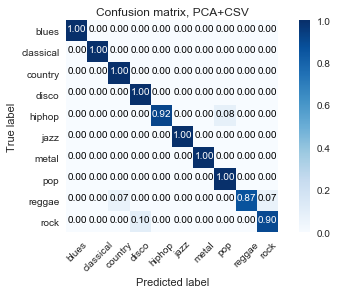

In [177]:
cnf_matrix_pcasvc = confusion_matrix(y_test, model_pcasvc.predict(X_test))
plt.figure()
project_module.PlotConfusionMatrix(cnf_matrix_pcasvc, classes=labels, normalize=True, title='Confusion matrix, PCA+CSV')

plt.show()

Normalized confusion matrix
[[ 0.88888889  0.          0.11111111  0.          0.          0.          0.
   0.          0.          0.        ]
 [ 0.          0.71428571  0.14285714  0.          0.          0.14285714
   0.          0.          0.          0.        ]
 [ 0.          0.          0.85714286  0.          0.          0.          0.
   0.14285714  0.          0.        ]
 [ 0.          0.          0.          0.83333333  0.          0.
   0.16666667  0.          0.          0.        ]
 [ 0.          0.          0.          0.08333333  0.75        0.
   0.08333333  0.08333333  0.          0.        ]
 [ 0.125       0.          0.          0.125       0.          0.75        0.
   0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.85714286  0.          0.          0.14285714]
 [ 0.          0.          0.08333333  0.          0.          0.          0.
   0.91666667  0.          0.        ]
 [ 0.          0.          0

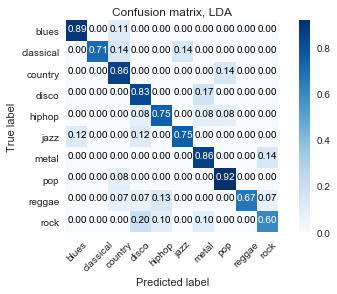

In [168]:
cnf_matrix_lda = confusion_matrix(y_test, model_lda.predict(X_test))
plt.figure()
project_module.PlotConfusionMatrix(cnf_matrix_lda, classes=labels, normalize=True, title='Confusion matrix, LDA')

plt.show()

** Сохранение обученных моделей **

In [169]:
from sklearn.externals import joblib

model_lda.fit(X, y)
model_pcasvc.fit(X, y)
model_lda_nn.fit(X, y)
model_pcasvc_nn.fit(X, y)

joblib.dump(model_pcasvc, "models/pcasvc.pkl")
joblib.dump(model_lda, "models/lda.pkl")
joblib.dump(model_pcasvc_nn, "models/pcasvc_nn.pkl")
joblib.dump(model_lda_nn, "models/lda_nn.pkl")

['models/lda_nn.pkl']

In [170]:
# И еще нужно сохранить порядок меток из датасета
labels_df = pd.DataFrame(index=labels, data={'id': xrange(len(labels))})
labels_df.to_csv("models/labels.csv")

(1000L, 154L)